# Разбор метода k - ближайших соседей

## выгрузка данных

In [37]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import mglearn
import sklearn

In [48]:
X, y = mglearn.datasets.make_forge()

E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [27]:
%matplotlib inline

##  пример данных для бинарной классификации

Форма массива X: (26, 2)


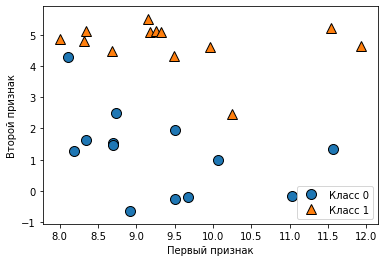

In [31]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print(f'Форма массива X: {X.shape}')

## сплит на тестовые и обучающие выборки

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## подгонка классификатора с использованием обучающей выборки 

In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
print(f'Прогнозы на тестовом наборе: {clf.predict(X_test)}')

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


## оценка достоверности

In [53]:
print(f'Оцена достоверности {clf.score(X_test, y_test)}')

Оцена достоверности 0.8571428571428571


## Анализ классификатора с визуализацией границы принятия решений

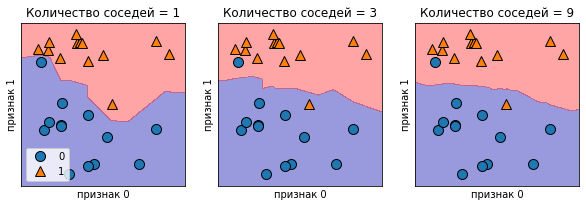

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'Количество соседей = {n_neighbors}')
    ax.set_xlabel('признак 0')
    ax.set_ylabel('признак 1')
axes[0].legend(loc=3)